In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ameen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
import pickle
import re
from xgboost import XGBClassifier


In [3]:
data = pd.read_csv(r"Data\amazon_alexa.tsv",delimiter="\t",quoting= 3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data['Length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [5]:
data.dtypes


rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
dtype: object

In [6]:
len(data)

3150

In [7]:
print(f"Rating value count \n{data['rating'].value_counts()}")

Rating value count 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


In [9]:
data.dropna(inplace=True
            )

randomly checking for 10th record

In [10]:
print(f"verified review colomn value \n{data.verified_reviews.iloc[10]}")

verified review colomn value 
"I sent it to my 85 year old Dad, and he talks to it constantly."


In [13]:
print(len(data.verified_reviews.iloc[10]))


65


In [14]:
print(data.Length.iloc[10])

65


# Analyzing the data
so the data is matching so we will proceed to analyzing the data

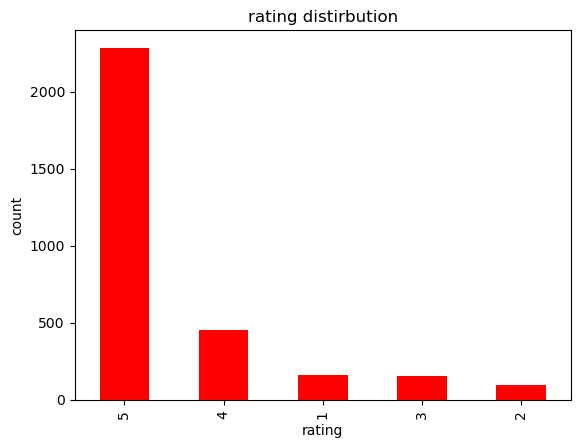

In [16]:
data['rating'].value_counts().plot.bar(color='red')
plt.title('rating distirbution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

making a pie chart 

In [20]:
print(round(data['rating'].value_counts()/data.shape[0]*100,2))

5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


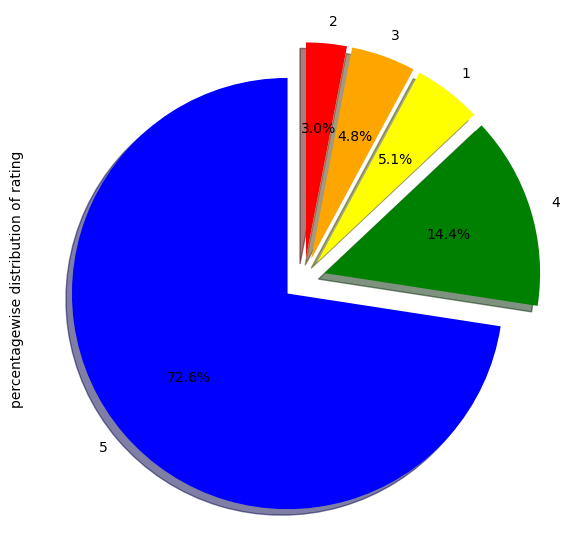

In [24]:
fig = plt.figure(figsize=(7,7))
colors = {'red','green','blue','yellow','orange'}
wp = {'linewidth':1,'edgecolor':'black'}
tags = data['rating'].value_counts()/data.shape[0]
explodes = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie',autopct = "%1.1f%%",shadow = True,startangle=90,colors=colors,explode=explodes,label='percentagewise distribution of rating')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph,format='png')

feedback column referring to who gave feedback and who didnt

In [25]:
print(data['feedback'].value_counts())

1    2893
0     257
Name: feedback, dtype: int64


In [26]:
data[data['feedback']==0].head()


,rating,date,variation,verified_reviews,feedback,Length
46,2,30-Jul-18,Charcoal Fabric,"""It's like Siri, in fact, Siri answers more ac...",0,165
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0,89
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [28]:
review_0 = data[data['feedback']==0].iloc[0]['verified_reviews']
print(review_0)

"It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals."


that means zero is negative feedback and 1 means positive feedback

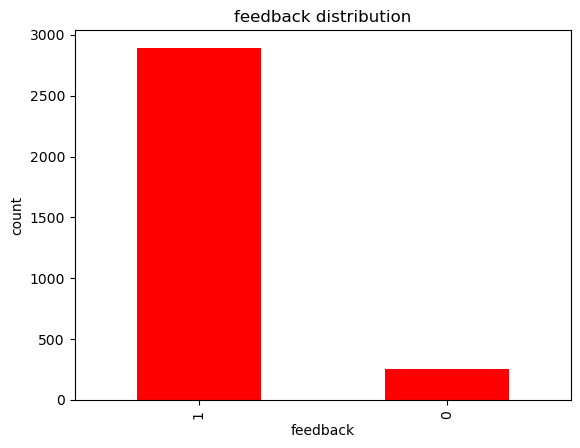

In [31]:
data['feedback'].value_counts().plot.bar(color='red')
plt.title("feedback distribution")
plt.xlabel('feedback')
plt.ylabel("count")
plt.show()

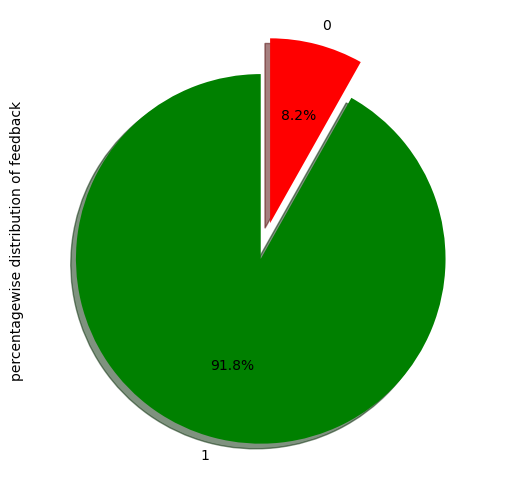

In [34]:
fig = plt.figure(figsize=(6,6))
colors = {'red','green'}
wp = {'linewidth':1,'edgecolor':'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explodes = (0.1,0.1)
tags.plot(kind='pie',autopct = "%1.1f%%",shadow = True,startangle=90,colors=colors,explode=explodes,label='percentagewise distribution of feedback')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph,format='png')

In [35]:
data[data['feedback']==0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [36]:
data[data['feedback']==1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

distribution of variations

In [37]:
print(data['variation'].unique())

['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 'Sandstone Fabric ' 'Oak Finish ' 'Black' 'White' 'Black  Spot'
 'White  Spot' 'Black  Show' 'White  Show' 'Black  Plus' 'White  Plus'
 'Configuration: Fire TV Stick' 'Black  Dot' 'White  Dot']


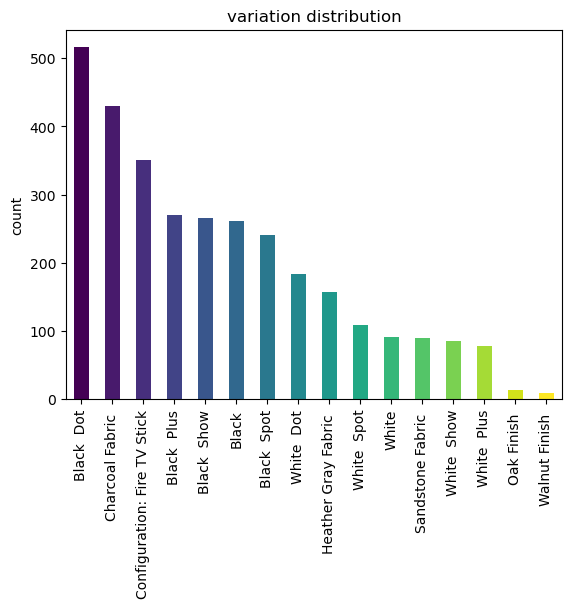

In [40]:
data['variation'].value_counts().plot(kind='bar',color=plt.cm.viridis(np.linspace(0, 1, len(data['variation'].unique()))))
plt.title('variation distribution')
plt.ylabel('count')
plt.show()

In [41]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

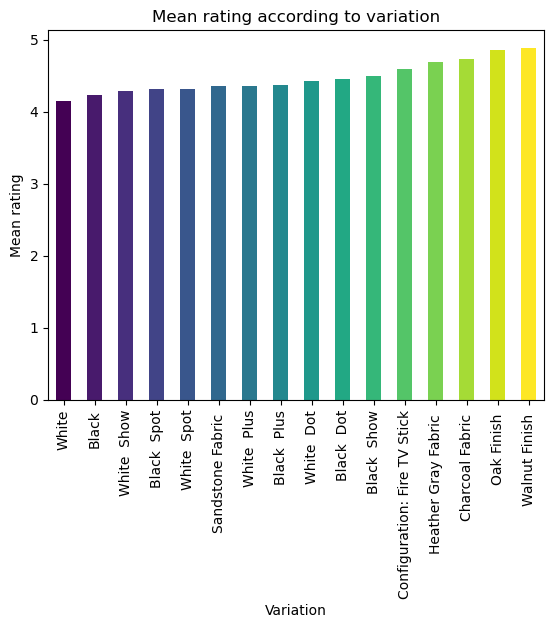

In [43]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color=plt.cm.viridis(np.linspace(0, 1, len(data['variation'].unique()))))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

analyzing verified reviews column

In [44]:
data['verified_reviews'].describe()

count     3150
unique    2301
top           
freq        79
Name: verified_reviews, dtype: object

In [45]:
data['Length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: Length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

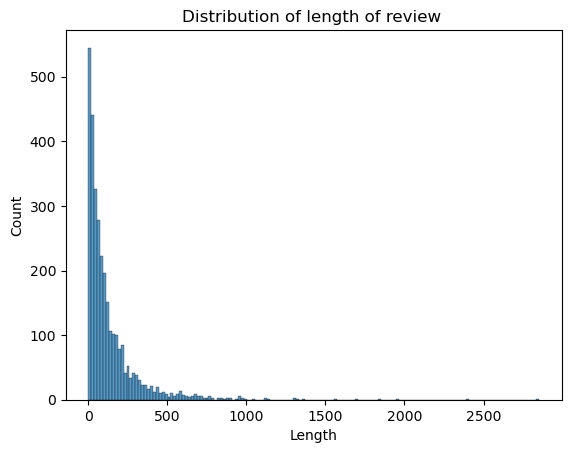

In [48]:
sns.histplot(data['Length']).set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

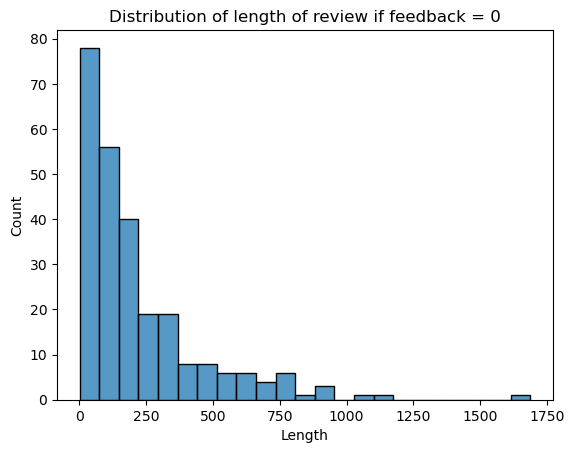

In [50]:
sns.histplot(data[data['feedback']==0]['Length']).set(title='Distribution of length of review if feedback = 0').

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

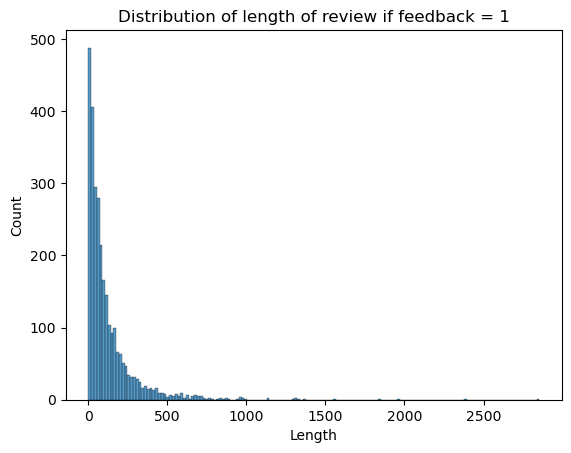

In [51]:
sns.histplot(data[data['feedback']==1]['Length']).set(title='Distribution of length of review if feedback = 1')